In [4]:
import time
import sys
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split, KFold
import multiprocessing
import os
from scipy import sparse

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr, pearsonr
from sklearn import ensemble

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy as sp

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
result = pd.read_csv('train_result_matrix.csv', sep=',')
result

,date,store_nbr,station_nbr,item_nbr,units,tmax,tmin,tavg,depart,dewpoint,...,SG,SH,SN,SO,SQ,SS,TS,UP,VA,VC
0,2012-01-01,1.0,1.0,9.0,29.0,52.0,31.0,42.0,16.0,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2012-01-01,1.0,1.0,28.0,2.0,52.0,31.0,42.0,16.0,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012-01-01,1.0,1.0,51.0,1.0,52.0,31.0,42.0,16.0,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012-01-01,2.0,14.0,5.0,191.0,50.0,34.0,42.0,5.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012-01-01,2.0,14.0,44.0,215.0,50.0,34.0,42.0,5.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2012-01-01,6.0,14.0,9.0,44.0,50.0,34.0,42.0,5.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2012-01-01,6.0,14.0,45.0,86.0,50.0,34.0,42.0,5.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2012-01-01,38.0,14.0,9.0,195.0,50.0,34.0,42.0,5.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2012-01-01,38.0,14.0,45.0,135.0,50.0,34.0,42.0,5.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2012-01-01,42.0,14.0,5.0,154.0,50.0,34.0,42.0,5.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
type(result)

pandas.core.frame.DataFrame

In [5]:
list_columns = ['tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 
                'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
                'resultspeed', 'resultdir', 'avgspeed']

store45 = result[result['store_nbr'] == 45]
item_nbr = store45[store45['item_nbr'] == 9]
date = item_nbr[item_nbr['date'] == '2014-10-31']
df_item = pd.DataFrame(date, columns=list_columns)
df_item

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
118652,53.0,34.0,44.0,-2.0,35.0,41.0,21.0,0.0,0.0,0.0,29.9,29.99,4.5,3.0,5.3


In [16]:
list_columns = ['tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 
                'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
                'resultspeed', 'resultdir', 'avgspeed']

store45 = result[result['store_nbr'] == 45]
item_nbr = store45[store45['item_nbr'] == 9]
print(type(item_nbr))
df_item = pd.DataFrame(item_nbr, columns=list_columns)
print(len(df_item.index))
#df_item = pd.DataFrame(preprocessing.normalize(df_item), columns=list_columns)
dfX = sm.add_constant(df_item)
dfy = item_nbr.units

model_sto_item = sm.OLS(dfy, dfX)
result_sto_item = model_sto_item.fit()
result_sto_item.summary()

<class 'pandas.core.frame.DataFrame'>
910


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  units   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9856
Date:                Mon, 12 Mar 2018   Prob (F-statistic):              0.466
Time:                        15:08:12   Log-Likelihood:                -3727.7
No. Observations:                 910   AIC:                             7485.
Df Residuals:                     895   BIC:                             7558.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0137      0.058      0.235      0.814      -0.101       0.128
tmax            0.0036      0.324      0.011      0.991      -0.633       0.640
tmin            0.0753      0.354      0.212      0.832      -0.620       0.770
tavg            0.2033      1.406      0.145      0.885      -2.557       2.964
depart          0.0258      0.069      0.375      0.708      -0.109       0.161
dewpoint       -0.2589      0.227     -1.142      0.254      -0.704       0.186
wetbulb         0.2916      0.473      0.616      0.538      -0.637       1.220
heat            0.3057      1.254      0.244      0.808      -2.156       2.768
cool           -0.3822      1.252     -0.305      0.760      -2.838       2.074
snowfall        0.6647      0.561      1.185      0.236      -0.436       1.765
preciptotal    -3.4155      2.296     -1.488      0.137      -7.921       1.090
stnpressure    20.0033     19.407      1.031      0.303     -18.085      58.092
sealevel      -19.9472     19.262     -1.036      0.301     -57.752      17.858
resultspeed     0.4483      0.404      1.110      0.267      -0.344       1.241
resultdir       0.0183      0.063      0.290      0.772      -0.106       0.143
avgspeed       -0.8160      0.453     -1.803      0.072      -1.704       0.072
==============================================================================
Omnibus:                      302.328   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              963.158
Skew:                           1.629   Prob(JB):                    7.13e-210
Kurtosis:                       6.845   Cond. No.                     2.73e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.85e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

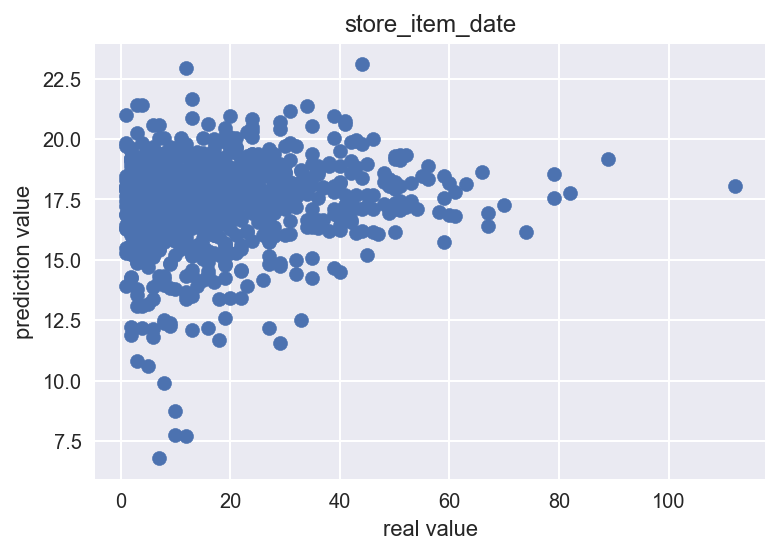

In [9]:
dfy_new = result_sto_item.predict(dfX)

plt.scatter(dfy, dfy_new)
plt.title("store_item_date")
plt.xlabel("real value")
plt.ylabel("prediction value")
plt.show()

레버리지의 합 : 14.999999999999996


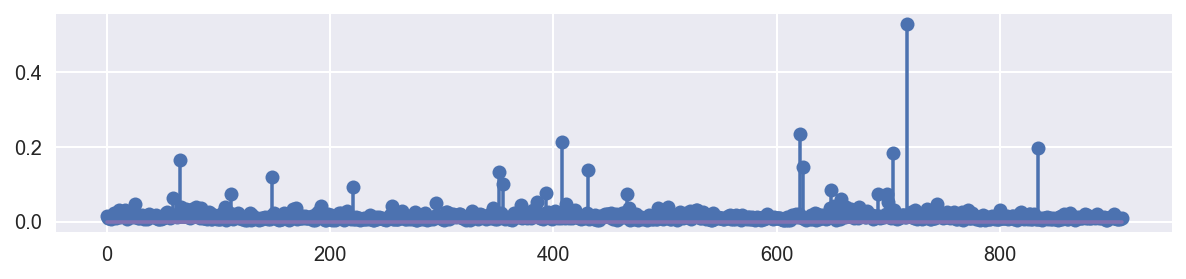

In [10]:
# 영향도 정보 객체 구하기

influence = result_sto_item.get_influence()
hat = influence.hat_matrix_diag
print("레버리지의 합 :", hat.sum())
plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

In [11]:
# 레버리지의 평균값 : 약 0.0075
#float(hat.sum) / float(len(df_item.index))
print(type(len(df_item.index)))
print(type((hat.sum())))

a = hat.sum() / len(df_item.index)
a 

<class 'int'>
<class 'numpy.float64'>


0.01648351648351648

In [10]:
# 레버리지 값이 약 0.03을 넘는 데이터를 찾는다
a * 4

0.06593406593406592

ValueError: too many values to unpack (expected 2)

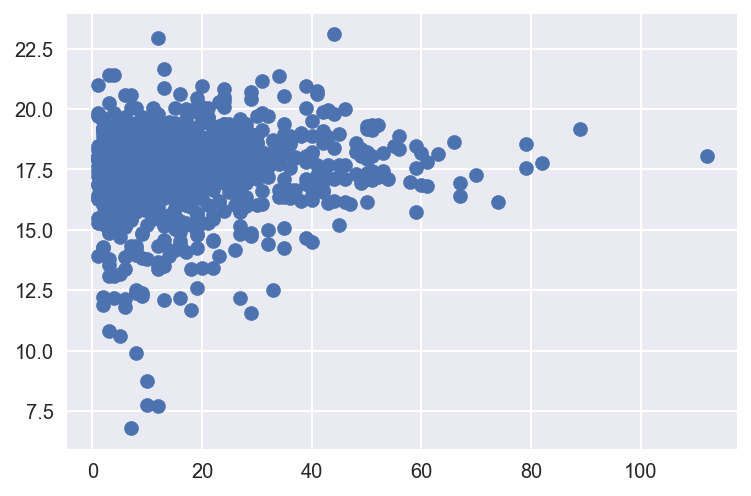

In [12]:
ax = plt.subplot()
plt.scatter(dfy, dfy_new)
sm.graphics.abline_plot(model_results=result_sto_item, ax=ax)
plt.show()

idx = hat > 0.07
plt.scatter(dfy[idx], dfy_new[idx], s=300, c="r", alpha=0.5)
plt.show()

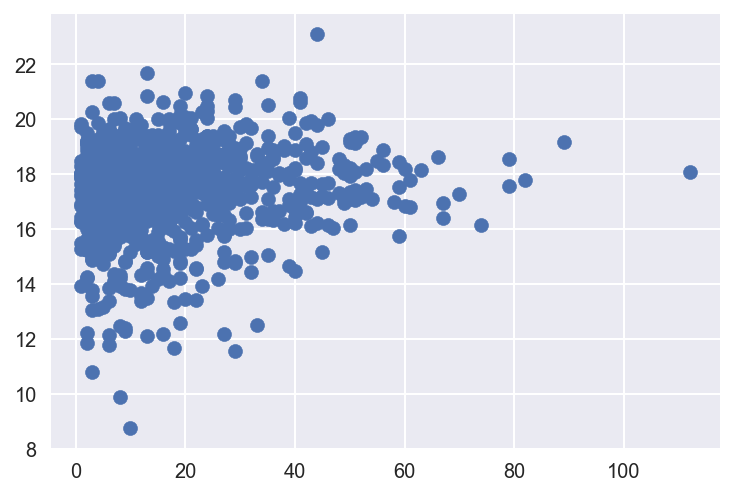

In [13]:
idx = hat < 0.07
plt.scatter(dfy[idx], dfy_new[idx])
plt.show()

In [22]:
idx = hat > 0.07
dfy[idx]

8162      14.0
14513     12.0
20063     10.0
30533      5.0
48331      7.0
48918      1.0
54423     43.0
56632     12.0
59693      7.0
63678      4.0
82456     17.0
82800      8.0
87010     35.0
92757      2.0
93635     15.0
94180     39.0
95692     31.0
110081    17.0
Name: units, dtype: float64

In [23]:
dfy_new[idx]

8162      18.918088
14513      7.715638
20063      7.744324
30533     10.613806
48331      6.773652
48918     21.012301
54423     19.937200
56632     22.923982
59693     17.732485
63678     12.181683
82456     16.041289
82800     12.394164
87010     14.248106
92757     19.643058
93635     18.571776
94180     20.958320
95692     21.154326
110081    19.128263
dtype: float64

In [24]:
dfy_new

75        17.007420
190       17.413318
313       17.309587
430       18.531585
550       18.979816
672       19.693159
792       18.829567
921       18.780553
1046      19.557257
1278      17.194173
1397      14.536221
1528      14.118475
1648      15.957360
1775      15.881706
1895      17.591771
2009      19.144281
2127      14.164285
2245      17.188118
2364      17.808957
2484      18.816747
2608      17.164257
2730      18.225129
2855      16.954228
2976      18.075716
3087      17.608737
3202      13.087822
3323      16.618197
3444      18.823149
3564      17.562092
3673      18.970425
            ...    
115325    16.933054
115433    19.052442
115522    18.224187
115610    18.337237
115703    19.056669
115778    16.441496
115843    17.168870
115906    13.548146
115977    15.484175
116066    18.187072
116159    16.652943
116254    17.218265
116358    17.446160
116457    16.839583
116538    16.877647
116613    18.884413
116688    18.687198
116754    18.547967
116824    17.018040


In [14]:
df_item2 = df_item.iloc[idx, :]
df_item2

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
75,50.0,30.0,40.0,16.0,37.0,40.0,25.0,0.0,0.0,0.09,29.80,29.89,4.2,21.0,6.8
190,50.0,30.0,40.0,15.0,26.0,35.0,25.0,0.0,0.0,0.01,29.48,29.59,9.6,27.0,10.9
313,32.0,11.0,22.0,-3.0,6.0,18.0,43.0,0.0,0.0,0.00,29.70,29.84,10.2,31.0,10.9
430,27.0,8.0,18.0,-8.0,-1.0,14.0,47.0,0.0,0.0,0.00,29.90,30.00,7.9,28.0,9.9
550,38.0,24.0,31.0,6.0,13.0,25.0,34.0,0.0,0.0,0.00,29.70,29.82,6.9,27.0,8.1
672,45.0,25.0,35.0,4.0,24.0,30.0,30.0,0.0,0.2,0.01,29.72,29.82,1.6,19.0,2.6
792,58.0,25.0,42.0,13.0,29.0,36.0,23.0,0.0,0.0,0.00,29.60,29.73,2.8,29.0,3.7
921,43.0,27.0,35.0,11.0,22.0,32.0,30.0,0.0,0.0,0.00,29.93,30.08,6.0,30.0,6.8
1046,38.0,21.0,30.0,5.0,14.0,25.0,35.0,0.0,0.0,0.00,30.09,30.18,2.7,25.0,5.3
1278,38.0,23.0,31.0,8.0,22.0,29.0,34.0,0.0,0.0,0.00,29.93,30.07,3.2,8.0,5.9


In [28]:
dfX = sm.add_constant(df_item)
dfy = item_nbr.units

model_sto_item = sm.OLS(dfy, dfX)
result_sto_item = model_sto_item.fit()
result_sto_item.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  units   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9856
Date:                Mon, 12 Mar 2018   Prob (F-statistic):              0.466
Time:                        13:14:58   Log-Likelihood:                -3727.7
No. Observations:                 910   AIC:                             7485.
Df Residuals:                     895   BIC:                             7558.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0137      0.058      0.235      0.814      -0.101       0.128
tmax            0.0036      0.324      0.011      0.991      -0.633       0.640
tmin            0.0753      0.354      0.212      0.832      -0.620       0.770
tavg            0.2033      1.406      0.145      0.885      -2.557       2.964
depart          0.0258      0.069      0.375      0.708      -0.109       0.161
dewpoint       -0.2589      0.227     -1.142      0.254      -0.704       0.186
wetbulb         0.2916      0.473      0.616      0.538      -0.637       1.220
heat            0.3057      1.254      0.244      0.808      -2.156       2.768
cool           -0.3822      1.252     -0.305      0.760      -2.838       2.074
snowfall        0.6647      0.561      1.185      0.236      -0.436       1.765
preciptotal    -3.4155      2.296     -1.488      0.137      -7.921       1.090
stnpressure    20.0033     19.407      1.031      0.303     -18.085      58.092
sealevel      -19.9472     19.262     -1.036      0.301     -57.752      17.858
resultspeed     0.4483      0.404      1.110      0.267      -0.344       1.241
resultdir       0.0183      0.063      0.290      0.772      -0.106       0.143
avgspeed       -0.8160      0.453     -1.803      0.072      -1.704       0.072
==============================================================================
Omnibus:                      302.328   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              963.158
Skew:                           1.629   Prob(JB):                    7.13e-210
Kurtosis:                       6.845   Cond. No.                     2.73e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.85e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

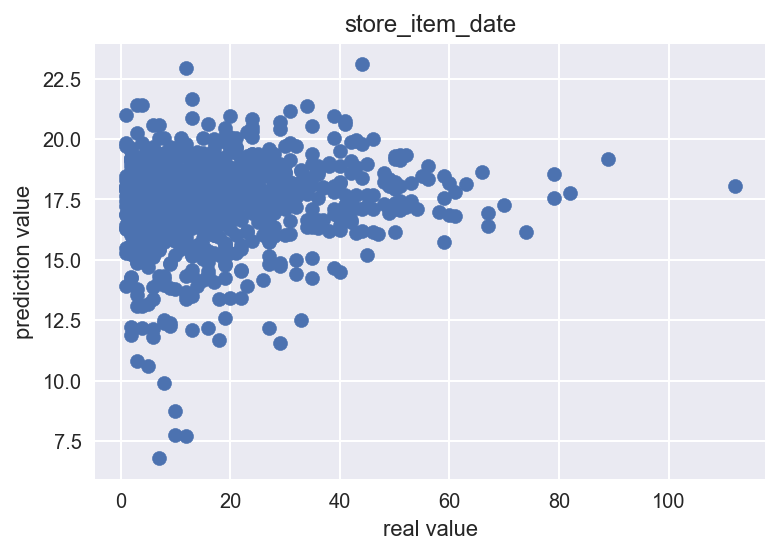

In [30]:
dfy_new = result_sto_item.predict(dfX)

plt.scatter(dfy, dfy_new)
plt.title("store_item_date")
plt.xlabel("real value")
plt.ylabel("prediction value")
plt.show()

레버리지의 합 : 14.999999999999996


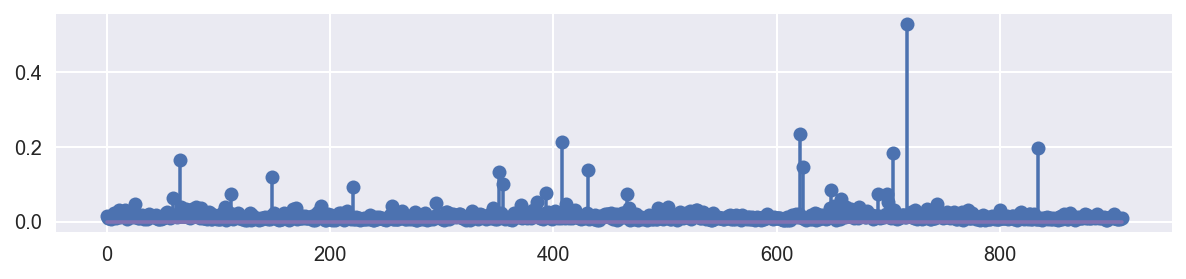

In [29]:
influence = result_sto_item.get_influence()
hat = influence.hat_matrix_diag
print("레버리지의 합 :", hat.sum())
plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

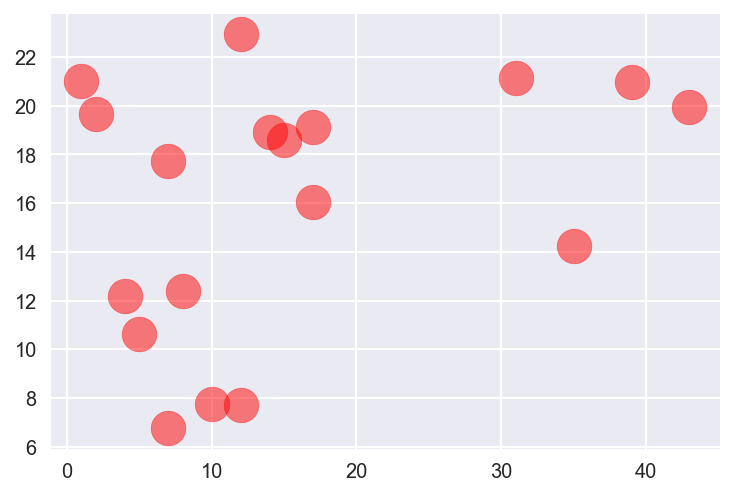

In [12]:
idx = hat > 0.07
plt.scatter(dfy[idx], dfy_new[idx], s=300, c="r", alpha=0.5)
plt.show()

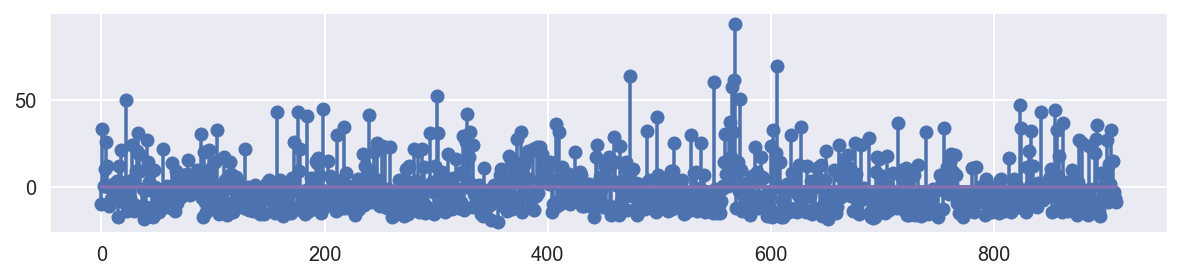

In [13]:
# 잔차 표시
plt.figure(figsize=(10, 2))
plt.stem(result_sto_item.resid)
plt.show()

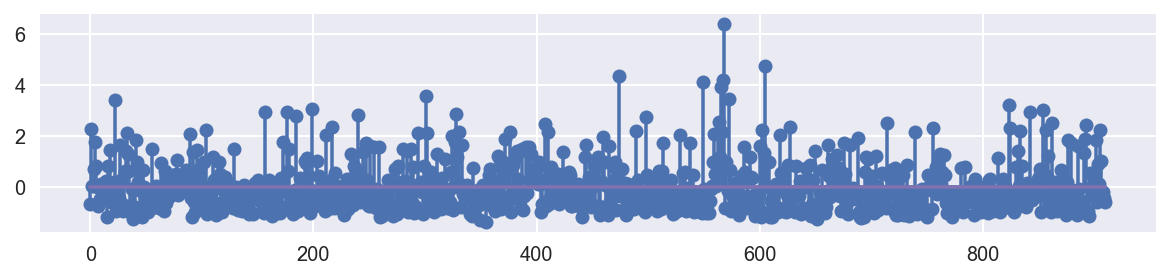

In [14]:
# 표준화 잔차 표시 
plt.figure(figsize=(10, 2))
plt.stem(result_sto_item.resid_pearson)
plt.show()

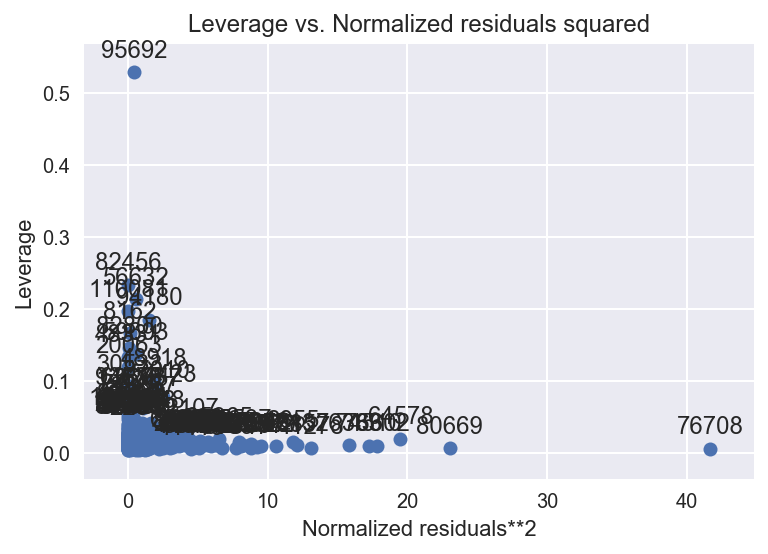

In [15]:
# 레버리지와 자차를 동시에 보여줌
# 데이터 아이디가 표시된 데이터들이 레버리지가 큰 아웃라이어
sm.graphics.plot_leverage_resid2(result_sto_item)
plt.show()

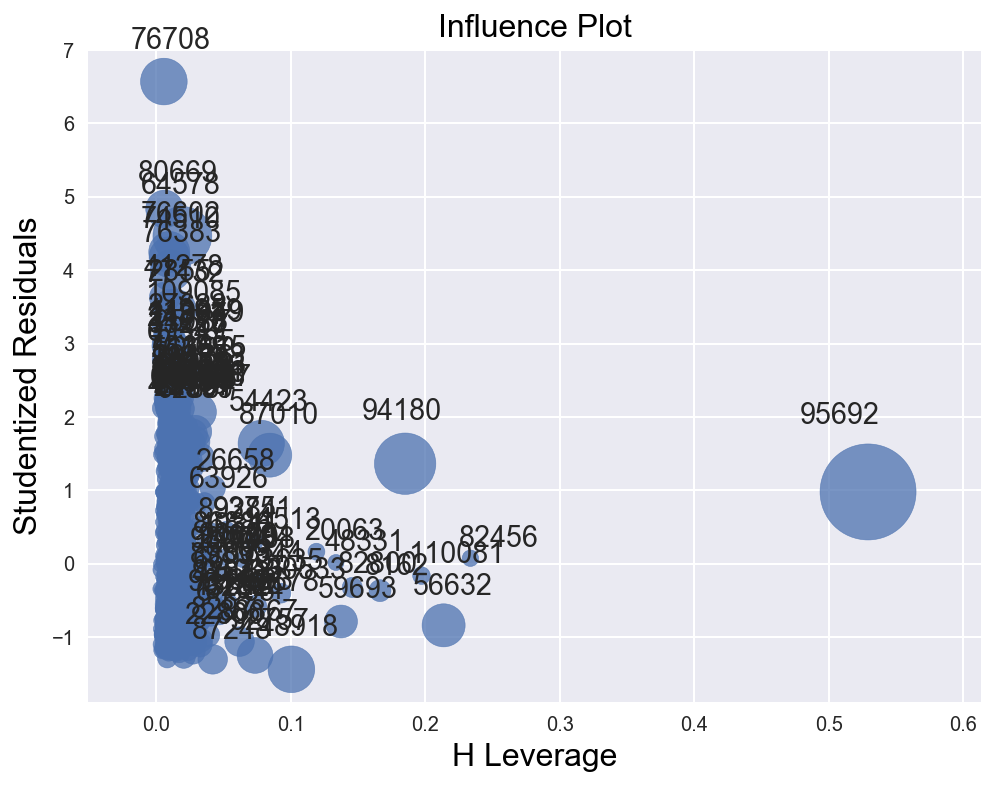

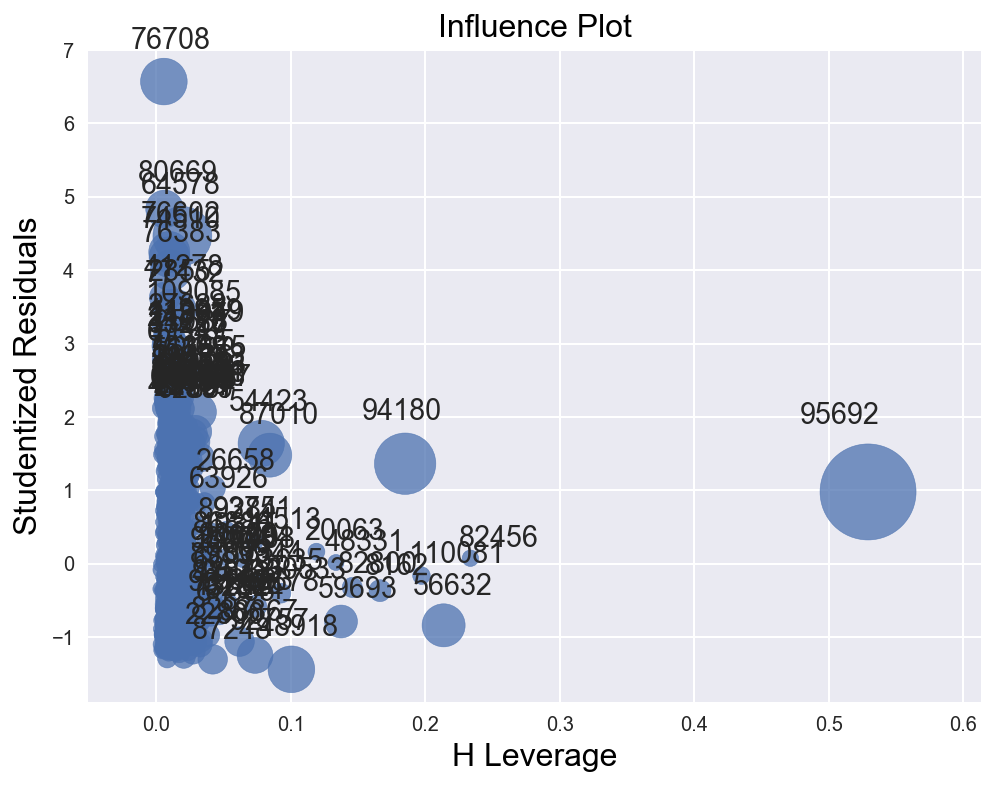

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.influence_plot(result_sto_item, ax=ax)
fig

In [ ]:
influence = result_sto_item.get_influence()
hat = influence.hat_matrix_diag
resid = result_sto_item.resid
resid2 = resid**2
resid2 /= resid2.sum()
nobs = int(idx.sum())
hm = hat_matrix_diag.mean()
rm = resid2.mean()